# New RMS for a single Spike

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt, triang
import gitInformation

In [2]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-11-15
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dowa\Desktop\IpythonNotebook\kt-2015-DSPHandsOn\.git
Current git SHA: 8bd95795b66b6beab499b0a2c829d11705e8d7fb
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [3]:
%matplotlib inline

### Generate a single Spike and all needed arrays

In [4]:
# Generate a spike, using a triangle function
tri = triang(11)
x = np.zeros(67)
data = np.append(tri,x)
data = np.append(x,data)

# Different noises with different standard deviations (spread or "width") will be saved in.
diff_noise = np.zeros((140,len(data)))

# Array for noised spikes. 
noised_data = np.zeros((140,len(data)))

# Array for median subtraction filtered spikes.
filtered_data = np.zeros((140,len(data)))

# Array for RMS of filtered signals. 
behav = np.zeros(140)

# Lists with used window lengths and standard deviation of noise.
wl = [3, 5, 7, 11, 15, 19, 23, 25, 27]
stdsn = [0.33333333, 0.25, 0.2, 0.1666667, 0.142857, 0.125, 0.11111111, 0.1]

### Calculation for new RMS

In [5]:
values = np.zeros((len(wl), len(stdsn)))
count = -1
count2 = -1
for s in stdsn:
    count = count + 1
    for w in wl:
        count2 = count2 + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, s, len(data))
            noised_data[i, :] = data + diff_noise[i, :]
            medfilter = medfilt(data, w)
            filtered_data[i, :] = noised_data[i, :] - medfilter
            behav[i] = np.sqrt(np.mean(np.square(filtered_data[i, :])))
        mean = np.mean(behav)   
        values[count2:count2+1:,-count] = mean
    count2 = -1
np.savetxt("valuesspikes2.txt", values)

In [6]:
# Viridis colormap for better viualisation
viridis_data = np.loadtxt("viridis_data.txt")

### Plot of RMS with different standard deviation of noise

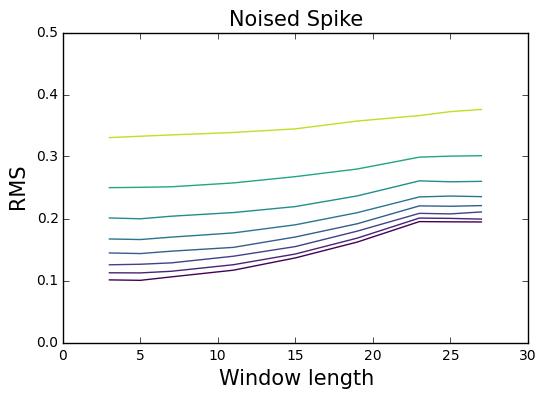

In [7]:
plt.figure()
for i in range (8):
    plt.axis([0, max(wl) + 3, 0, .5])
    plt.title("Noised Spike", size = 15) 
    plt.xlabel('Window length', fontsize = 15)
    plt.ylabel('RMS', fontsize = 15)
    plt.plot(wl,values[:,i], color=viridis_data[((i)*25)-25,:])
    plt.plot(np.std(data))
plt.savefig('Behavior given noise different wl spike.png', dpi = 600)